In [1]:
#Import packages
import os
import glob
import json
#from tqdm import tqdm

import nilearn
import nibabel as nib
from nilearn import image as nimg
from nilearn import plotting as nplot
# from nilearn.glm.first_level import FirstLevelModel, make_first_level_design_matrix, run_glm
#from nilearn.glm import fdr_threshold,threshold_stats_img
# from nilearn.glm.contrasts import compute_contrast


from bids.layout import BIDSLayout, parse_file_entities

# import cortex
# from cortex import fmriprep

# from nipype.interfaces.workbench.base import WBCommand
# from nipype.algorithms import modelgen
# from nipype.interfaces.base import Bunch

import hcp_utils as hcp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

# from PIL import Image

import first_level_sparse_scanning as flss 
import utils
import importlib


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [31]:
#del pvr_filtered[-1]

In [13]:
# tasks_included = ['emosent']
# parsed_valid_runs = flss.parse_valid_runs(tasks_included)

In [9]:
events = glob.glob('test/*.tsv')
# sub_list = [856, 859, 860, 867, 872, 873, 875, 877, 891, 
#             893, 895, 896, 897, 898, 957, 962, 963, 967, 
#             968, 969, 973, 976, 978, 979, 981]
#sub_list = [856,859, 860, 875, 893]
#sub_list = [875]
sub_list = [856]
sub_list = ['voice' + str(s) for s in sub_list]
test_img = [parse_file_entities(ev) for ev in events if parse_file_entities(ev)['subject'] in sub_list]
test_img

[{'subject': 'voice856',
  'session': '1',
  'task': 'emosent',
  'run': 2,
  'suffix': 'events',
  'extension': '.tsv'},
 {'subject': 'voice856',
  'session': '1',
  'task': 'emosent',
  'run': 3,
  'suffix': 'events',
  'extension': '.tsv'}]

In [29]:
sub = 'voice875'#test_img[0]['subject']
ses = test_img[0]['session']
task = test_img[0]['task']
run = test_img[0]['run']

In [30]:
conf = pd.read_csv(f"../../derivatives/fmriprep/sub-{sub}/ses-{ses}/func/sub-{sub}_ses-{ses}_task-{task}_run-{run}_desc-confounds_timeseries.tsv", sep = '\t')

In [31]:
motion_outliers = conf[[col for col in conf.columns if 'motion_outlier' in col]]

In [32]:
motion_outliers.shape[1]/motion_outliers.shape[0]

0.5

In [5]:
# test_img = [p for p in parsed_valid_runs if p['subject'] == 'voice856']
# test_img[0]['run'] = 2
# test_img[1]['run'] = 3
# test_img

In [10]:
##for f-test

#contrast_list = ['happyvsil','neutralvsil','sadvsil']

#contrast_list = ['sadvneutral', 'speechvsil']
#contrast_list = ['happyvneutral']
contrast_list = ['speechvsil']

importlib.reload(flss)
#out_dir='../../derivatives/first_level_percondition/'
#out_dir = '../../derivatives/first_level_emosent_emospeech_112523/'
#out_dir = '../../derivatives/first_level_emosent_sadneutral_112713/'

#flss.convolve_sparse_scan_glm_with_cifti(pvr_filtered[0:1], out_dir, ohbm=True, con='sadvneutral', resmooth=False)
# for con in contrast_list:
#     flss.convolve_sparse_scan_glm_with_cifti(parsed_valid_runs, out_dir, ohbm=True, con=con, resmooth=False)
    #print(c,d)

out_dir='test/'    
con  = 'speechvsil'
probe = flss.convolve_sparse_scan_glm_with_cifti(test_img, out_dir, ohbm=True, con=con, resmooth=False, runshift = False)

started sub-voice856_ses-1_task-emosent_rec-unco_run-2
240117-17:47:58,350 nipype.interface INFO:
	 Setting dt = 110 ms

240117-17:47:58,353 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
240117-17:47:58,353 nipype.interface INFO:
	 reg_scale: 43.1973
240117-17:47:58,357 nipype.interface INFO:
	 Setting dt = 110 ms

240117-17:47:58,360 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
240117-17:47:58,360 nipype.interface INFO:
	 reg_scale: 43.1973
240117-17:47:58,363 nipype.interface INFO:
	 Setting dt = 110 ms

240117-17:47:58,364 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
240117-17:47:58,365 nipype.interface INFO:
	 reg_scale: 43.1973
240117-17:47:58,368 nipype.interface INFO:
	 Setting dt = 110 ms

240117-17:47:58,370 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
240117-17:47:58,370 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice856_ses-1_task-emosent_rec-unco_run-2
started sub-voice856_ses-1_task-emosent_rec-unco_run-3
24

<Axes: label='conditions', ylabel='scan number'>

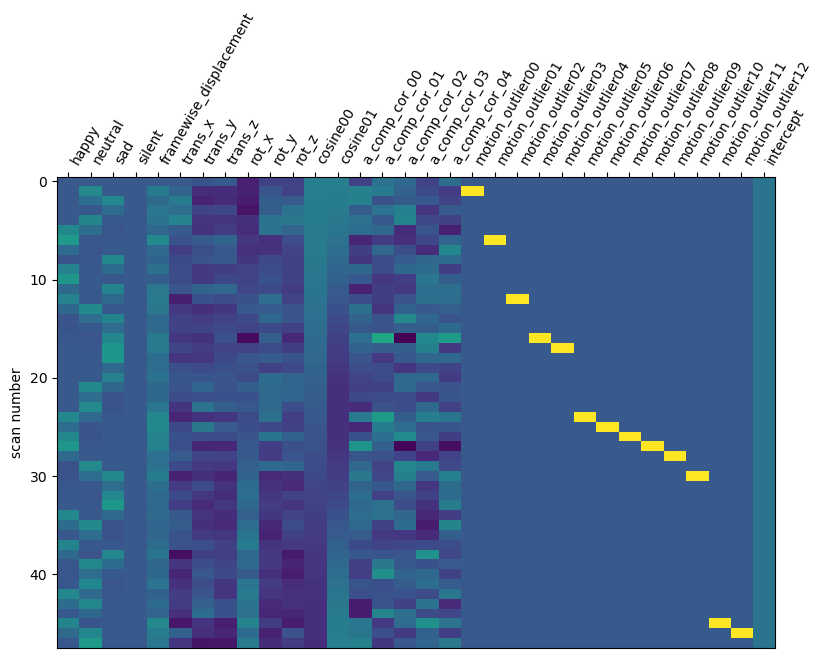

In [11]:
nplot.plot_design_matrix(probe[1])

In [21]:
## dvars_nstd typically should be at 10x 0.5%, we are seeing 10X that in general
## not fd_perc or fd_num since my motion is already high
## In column β1 GCOR, the global correlation averaged over the brain mask (GCOR) was added as a subject level covariate in the t-test.
## So GCOR is a regressor? not a threshold? Use as a subject-level covariate
## Oversimplified, but 85 might be a theoretical high for tsnr in grey matter

mriqc_iqm = pd.read_table('../../derivatives/mriqc/group_bold.tsv')
emosent_qc = mriqc_iqm[mriqc_iqm.bids_name.str.contains('emosent')]
subject_qc = mriqc_iqm[mriqc_iqm.bids_name.str.contains('emosent') & mriqc_iqm.bids_name.str.contains('856')]

In [8]:
#!rm -r test/*nii
!ls test/

fails.txt
second_level
sub-voice856_ses-1_task-emosent_run-2_events.tsv
sub-voice856_ses-1_task-emosent_run-3_events.tsv
sub-voice859_ses-1_task-emosent_run-1_events.tsv
sub-voice859_ses-1_task-emosent_run-2_events.tsv
sub-voice860_ses-1_task-emosent_run-1_events.tsv
sub-voice860_ses-1_task-emosent_run-2_events.tsv
sub-voice867_ses-1_task-emosent_run-2_events.tsv
sub-voice872_ses-1_task-emosent_run-2_events.tsv
sub-voice873_ses-1_task-emosent_run-2_events.tsv
sub-voice875_ses-1_task-emosent_run-1_events.tsv
sub-voice875_ses-1_task-emosent_run-2_events.tsv
sub-voice877_ses-1_task-emosent_run-2_events.tsv
sub-voice891_ses-1_task-emosent_run-2_events.tsv
sub-voice893_ses-1_task-emosent_run-1_events.tsv
sub-voice893_ses-1_task-emosent_run-2_events.tsv
sub-voice895_ses-1_task-emosent_run-1_events.tsv
sub-voice895_ses-1_task-emosent_run-2_events.tsv
sub-voice896_ses-1_task-emosent_run-1_events.tsv
sub-voice896_ses-1_task-emosent_run-2_events.tsv
sub-voice897_ses-1_task-emosent_run-2_events.t

In [12]:
#first_lv_betas = glob.glob('test/*nii')
first_lv_betas = glob.glob('test/*856*z_score*nii')
#first_lv_betas = glob.glob('test/*875*nii')
first_img = {parse_file_entities(b)['subject']+ '_run-' + str(parse_file_entities(b)['run']):
       pd.DataFrame(nimg.load_img(b).get_fdata(dtype='f4')).T for b in first_lv_betas}

In [51]:
# r = 3
# image = nimg.load_img(f'test/sub-voice856_ses-1_task-emosent_rec-unco_run-{r}_space-fsLR_den-91k_contrast-speechvsil_z_score.dscalar.nii')

# r = 'fixed'
# image = nimg.load_img('test/second_level/sub-voice856_ses-1_task-emosent_rec-unco_space-fsLR_den-91k_contrast-speechvsil_effect_size_fx.dscalar.nii')
# contrast_maps = pd.DataFrame(image.get_fdata(dtype='f4')).T
# from scipy import stats
# contrast_maps = contrast_maps.apply(lambda z: stats.zscore(z))

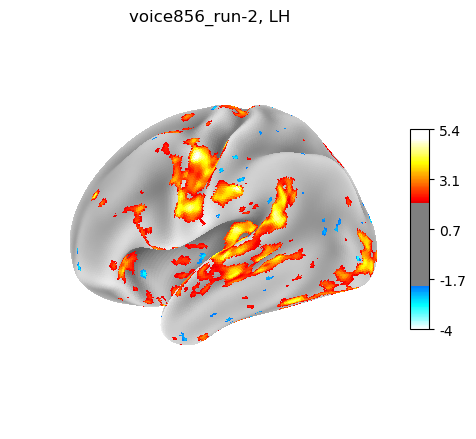

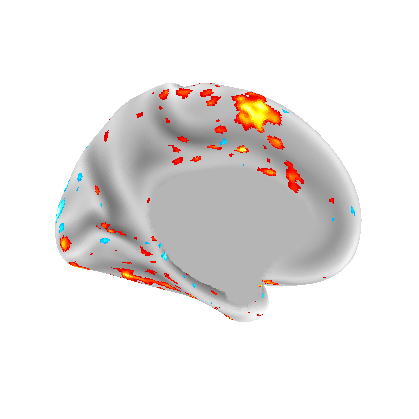

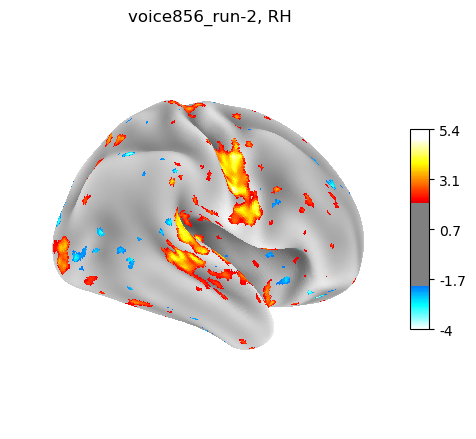

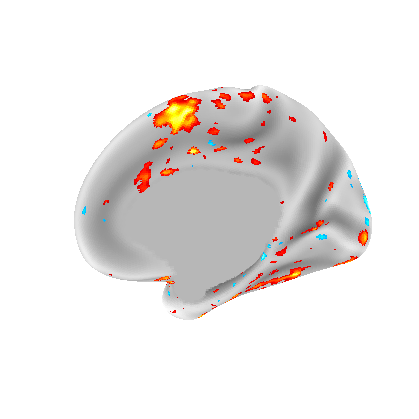

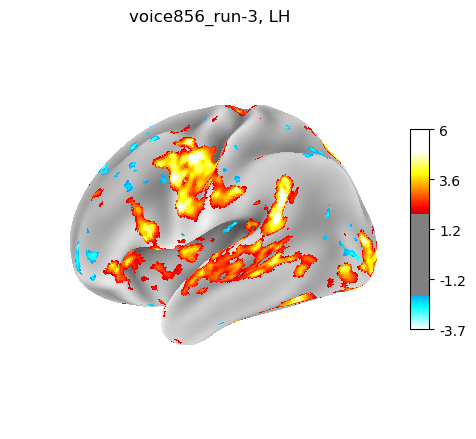

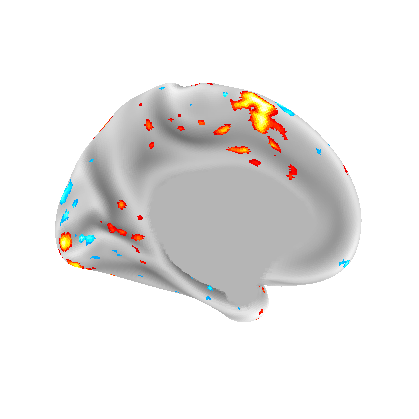

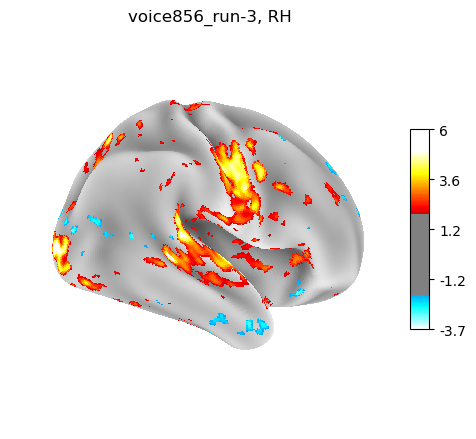

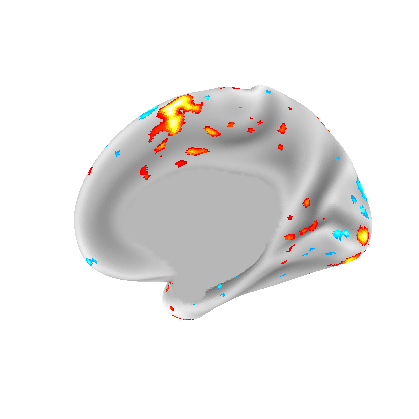

In [13]:
vmax = 5

# cifti = nib.load('../../derivatives/second_level_110123/sub-voice844_ses-1_task-nwr_rec-unco_run-1_space-fsLR_den-91k_contrast-spchsil_effect_size.dscalar.nii')
# cifti_hdr = cifti.header
# axes = [cifti_hdr.get_axis(i) for i in range(cifti.ndim)]
for sub_run, contrast_maps in first_img.items():
    for c in contrast_maps.columns:

        title = sub_run
        #threshold = fdr_threshold(contrast_maps[c], alpha=0.05)
        threshold = 1.96
        #threshold = 0
        nplot.plot_surf_stat_map(
            hcp.mesh.inflated, hcp.cortex_data(contrast_maps[c]), hemi='left', threshold=threshold,
            symmetric_cbar = False,
            colorbar=True,
            title = f'{title}, LH', #output_file=f'{root}/{c}_hemi-LH_view-lateral.png',
            title_font_size=30, vmax = vmax,
            bg_map=hcp.mesh.sulc)

        nplot.plot_surf_stat_map(
            hcp.mesh.inflated_left, hcp.left_cortex_data(contrast_maps[c]), view= 'lateral',
            hemi='right', threshold=threshold,
            symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-LH_view-medial.png',
            colorbar=False, vmax = vmax,  
            bg_map=hcp.mesh.sulc_left)

        nplot.plot_surf_stat_map(
            hcp.mesh.inflated, hcp.cortex_data(contrast_maps[c]), hemi='right', threshold=threshold,
            symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-RH_view-lateral.png',
            colorbar=True,
            title = f'{title}, RH', vmax = vmax,
            bg_map=hcp.mesh.sulc)

        nplot.plot_surf_stat_map(
            hcp.mesh.inflated_right, hcp.left_cortex_data(contrast_maps[c]), view= 'lateral',
            hemi='left', threshold=threshold,
            symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-RH_view-medial.png',
            colorbar=False, vmax = vmax,
            bg_map=hcp.mesh.sulc_right)

    #     subcortical = utils.volume_from_cifti(contrast_maps[c], axes[1])#.get_fdata(dtype='f4')
    #     nplot.plot_stat_map(subcortical, #threshold=threshold, #cut_coords=cut_coord,
    #                     vmax=vmax, title=f'subcortical')

        nplot.show()

In [14]:
second_lv_betas = glob.glob('test/second_level/*effect_size*')
second_img = {parse_file_entities(b)['subject']:
       pd.DataFrame(nimg.load_img(b).get_fdata(dtype='f4')).T for b in second_lv_betas}

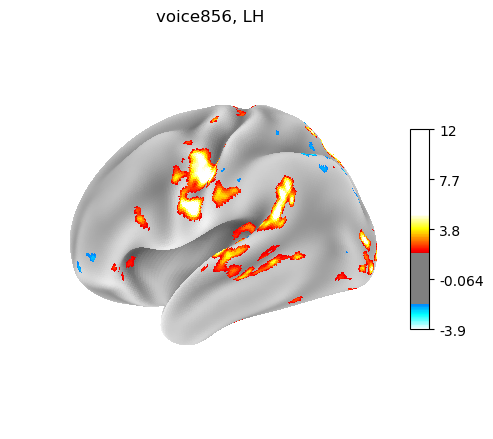

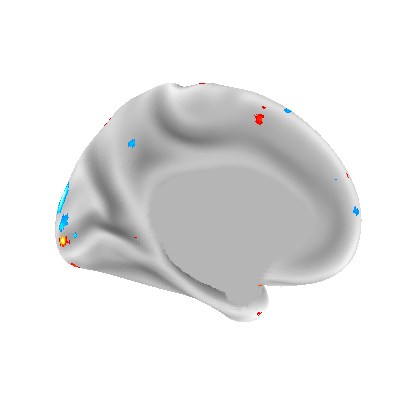

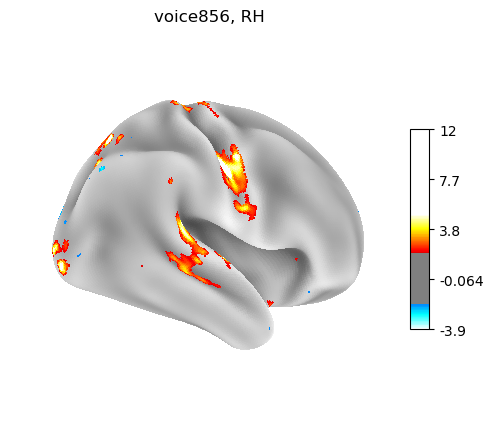

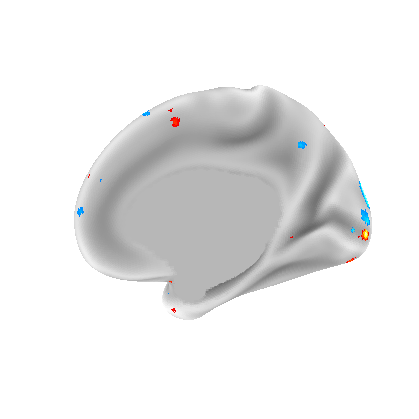

In [16]:
from scipy import stats

vmax = 5

# cifti = nib.load('../../derivatives/second_level_110123/sub-voice844_ses-1_task-nwr_rec-unco_run-1_space-fsLR_den-91k_contrast-spchsil_effect_size.dscalar.nii')
# cifti_hdr = cifti.header
# axes = [cifti_hdr.get_axis(i) for i in range(cifti.ndim)]
for sub_run, contrast_maps in second_img.items():
    for c in contrast_maps.columns:

        title = sub_run
        contrast_maps = contrast_maps.apply(lambda z: stats.zscore(z))
        #threshold = fdr_threshold(contrast_maps[c], alpha=0.05)
        threshold = 1.96
    #    threshold = 0
        nplot.plot_surf_stat_map(
            hcp.mesh.inflated, hcp.cortex_data(contrast_maps[c]), hemi='left', threshold=threshold,
            symmetric_cbar = False,
            colorbar=True,
            title = f'{title}, LH', #output_file=f'{root}/{c}_hemi-LH_view-lateral.png',
            title_font_size=30, vmax = vmax,
            bg_map=hcp.mesh.sulc)

        nplot.plot_surf_stat_map(
            hcp.mesh.inflated_left, hcp.left_cortex_data(contrast_maps[c]), view= 'lateral',
            hemi='right', threshold=threshold,
            symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-LH_view-medial.png',
            colorbar=False, vmax = vmax,  
            bg_map=hcp.mesh.sulc_left)

        nplot.plot_surf_stat_map(
            hcp.mesh.inflated, hcp.cortex_data(contrast_maps[c]), hemi='right', threshold=threshold,
            symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-RH_view-lateral.png',
            colorbar=True,
            title = f'{title}, RH', vmax = vmax,
            bg_map=hcp.mesh.sulc)

        nplot.plot_surf_stat_map(
            hcp.mesh.inflated_right, hcp.left_cortex_data(contrast_maps[c]), view= 'lateral',
            hemi='left', threshold=threshold,
            symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-RH_view-medial.png',
            colorbar=False, vmax = vmax,
            bg_map=hcp.mesh.sulc_right)

    #     subcortical = utils.volume_from_cifti(contrast_maps[c], axes[1])#.get_fdata(dtype='f4')
    #     nplot.plot_stat_map(subcortical, #threshold=threshold, #cut_coords=cut_coord,
    #                     vmax=vmax, title=f'subcortical')

        nplot.show()

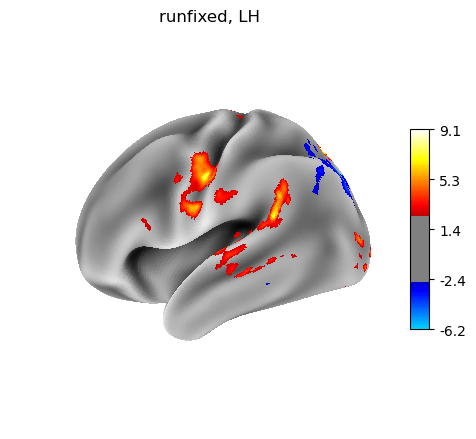

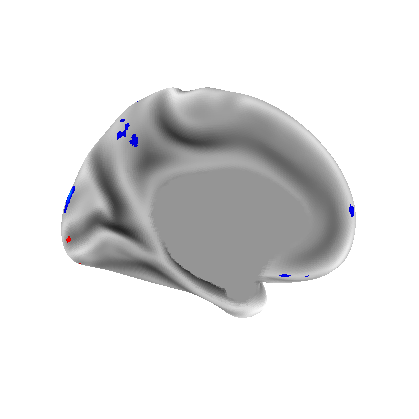

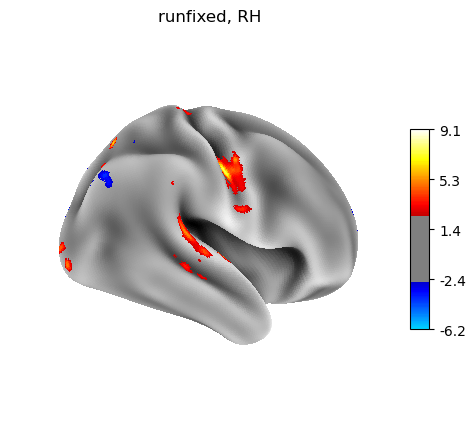

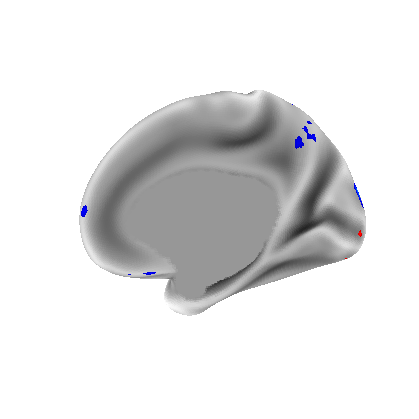

In [52]:
#vmax = 3

# cifti = nib.load('../../derivatives/second_level_110123/sub-voice844_ses-1_task-nwr_rec-unco_run-1_space-fsLR_den-91k_contrast-spchsil_effect_size.dscalar.nii')
# cifti_hdr = cifti.header
# axes = [cifti_hdr.get_axis(i) for i in range(cifti.ndim)]

for c in contrast_maps.columns:
    
    title = f'run{r}'
    #threshold = fdr_threshold(contrast_maps[c], alpha=0.05)
    threshold = 2.576
#    threshold = 0
    nplot.plot_surf_stat_map(
        hcp.mesh.inflated, hcp.cortex_data(contrast_maps[c]), hemi='left', threshold=threshold,
        symmetric_cbar = False,
        colorbar=True,
        title = f'{title}, LH', #output_file=f'{root}/{c}_hemi-LH_view-lateral.png',
        title_font_size=30, #vmax = vmax,
        bg_map=hcp.mesh.sulc)

    nplot.plot_surf_stat_map(
        hcp.mesh.inflated_left, hcp.left_cortex_data(contrast_maps[c]), view= 'lateral',
        hemi='right', threshold=threshold,
        symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-LH_view-medial.png',
        colorbar=False, #vmax = vmax,  
        bg_map=hcp.mesh.sulc_left)

    nplot.plot_surf_stat_map(
        hcp.mesh.inflated, hcp.cortex_data(contrast_maps[c]), hemi='right', threshold=threshold,
        symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-RH_view-lateral.png',
        colorbar=True,
        title = f'{title}, RH', #vmax = vmax,
        bg_map=hcp.mesh.sulc)

    nplot.plot_surf_stat_map(
        hcp.mesh.inflated_right, hcp.left_cortex_data(contrast_maps[c]), view= 'lateral',
        hemi='left', threshold=threshold,
        symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-RH_view-medial.png',
        colorbar=False, #vmax = vmax,
        bg_map=hcp.mesh.sulc_right)
    
#     subcortical = utils.volume_from_cifti(contrast_maps[c], axes[1])#.get_fdata(dtype='f4')
#     nplot.plot_stat_map(subcortical, #threshold=threshold, #cut_coords=cut_coord,
#                     vmax=vmax, title=f'subcortical')
    
    nplot.show()

In [17]:
# importlib.reload(flss)
# #out_dir='../../derivatives/first_level_percondition/'
# out_dir = '../../derivatives/first_level_emosent_ftest_112523/'
# #out_dir='test/'

# #flss.convolve_sparse_scan_glm_with_cifti(pvr_filtered[0:1], out_dir, ohbm=True, con='sadvneutral', resmooth=False)
# flss.convolve_sparse_scan_glm_with_cifti(pvr_filtered, out_dir, ohbm=True, con='emoftest', resmooth=False)

# #flss.convolve_sparse_scan_glm_with_cifti(parsed_valid_runs, out_dir)

started sub-voice844_ses-1_task-emosent_rec-unco_run-1
231125-15:37:14,572 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:37:14,574 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:37:14,575 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:37:14,578 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:37:14,580 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:37:14,581 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:37:14,584 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:37:14,586 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:37:14,587 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:37:14,590 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:37:14,592 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:37:14,593 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice844_ses-1_task-emosent_rec-unco_run-1
started sub-voice844_ses-1_task-emosent_rec-unco_run-2
23

231125-15:38:17,535 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:38:17,539 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:38:17,540 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:38:17,541 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:38:17,544 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:38:17,546 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:38:17,547 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice856_ses-1_task-emosent_rec-unco_run-2
started sub-voice857_ses-1_task-emosent_rec-unco_run-1
231125-15:38:25,143 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:38:25,145 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:38:25,146 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:38:25,149 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:38:25,150 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:38:25,151 nipype.interface INFO:
	 reg_scale: 4

231125-15:39:25,796 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:39:25,796 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:39:25,802 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:39:25,804 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:39:25,805 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:39:25,809 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:39:25,811 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:39:25,812 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:39:25,816 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:39:25,818 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:39:25,819 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice872_ses-1_task-emosent_rec-unco_run-1
started sub-voice875_ses-1_task-emosent_rec-unco_run-2
231125-15:39:33,745 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:39:33,748 nipype.interface INFO:
	 response sum

231125-15:40:26,905 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice893_ses-1_task-emosent_rec-unco_run-1
started sub-voice893_ses-1_task-emosent_rec-unco_run-2
231125-15:40:34,456 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:40:34,458 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:40:34,459 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:40:34,462 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:40:34,464 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:40:34,465 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:40:34,468 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:40:34,470 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:40:34,471 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:40:34,474 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:40:34,476 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:40:34,477 nipype.interface INFO:
	 reg_scale: 4

231125-15:41:35,885 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:41:35,889 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:41:35,892 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:41:35,893 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice949_ses-1_task-emosent_rec-unco_run-1
started sub-voice949_ses-1_task-emosent_rec-unco_run-2
231125-15:41:43,458 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:41:43,460 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:41:43,461 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:41:43,464 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:41:43,466 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:41:43,466 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:41:43,470 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:41:43,471 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:41:43,472 nipype.interface INFO:
	 reg_scale: 4

231125-15:42:47,317 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:42:47,322 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:42:47,324 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:42:47,324 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:42:47,328 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:42:47,330 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:42:47,331 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice954_ses-1_task-emosent_rec-unco_run-2
started sub-voice955_ses-1_task-emosent_rec-unco_run-1
231125-15:42:55,440 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:42:55,442 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:42:55,443 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:42:55,446 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:42:55,448 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:42:55,448 nipype.interface INFO:
	 reg_scale: 4

231125-15:44:00,570 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:44:00,571 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:44:00,578 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:44:00,581 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:44:00,581 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:44:00,587 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:44:00,590 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:44:00,591 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:44:00,596 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:44:00,599 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:44:00,600 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice960_ses-1_task-emosent_rec-unco_run-1
started sub-voice960_ses-1_task-emosent_rec-unco_run-2
231125-15:44:08,197 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:44:08,199 nipype.interface INFO:
	 response sum

231125-15:45:01,517 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice964_ses-1_task-emosent_rec-unco_run-1
started sub-voice964_ses-1_task-emosent_rec-unco_run-2
231125-15:45:09,239 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:45:09,240 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:45:09,241 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:45:09,243 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:45:09,244 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:45:09,244 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:45:09,247 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:45:09,248 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:45:09,248 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:45:09,251 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:45:09,252 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:45:09,252 nipype.interface INFO:
	 reg_scale: 4

231125-15:46:10,960 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:46:10,964 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:46:10,966 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:46:10,967 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice975_ses-1_task-emosent_rec-unco_run-1
started sub-voice975_ses-1_task-emosent_rec-unco_run-2
231125-15:46:18,713 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:46:18,714 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:46:18,715 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:46:18,717 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:46:18,718 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:46:18,719 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:46:18,721 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:46:18,722 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:46:18,723 nipype.interface INFO:
	 reg_scale: 4

231125-15:47:20,707 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:47:20,711 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:47:20,713 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:47:20,714 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:47:20,717 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:47:20,719 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:47:20,720 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice981_ses-1_task-emosent_rec-unco_run-1
started sub-voice981_ses-1_task-emosent_rec-unco_run-2
231125-15:47:28,503 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:47:28,505 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:47:28,505 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:47:28,508 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:47:28,509 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:47:28,509 nipype.interface INFO:
	 reg_scale: 4